# Особенности matplotlib

В данном разделе рассмотрим некоторые особенности библиотеки [matplotlib](https://matplotlib.org/), наиболее часто применяемые на практике, на примере построения графика функции

$$
f(x) = x^3
$$ (func_x3_eq)

на отрезке $x \in [-2, 2]$.

```{note}
Будем использовать объектно-ориентированный стиль (см. {doc}`ch1-basics`).
```

## Данные для визуализации

Опишем функцию $f(x)$, инициализируем расчётную сетку (расчётные точки) `x` и посчитаем значения `y` в этих точках:

In [1]:
import numpy as np

def func(x):
    return x**3

x = np.linspace(-2, 2, 101)
y = func(x)

## Подписи графика и его осей, отображение сетки

Отобразить названия осей можно с помощью методов `set_xlabel(...)` и `set_ylabel(...)` класса `plt.axis`.
При этом действует математический синтаксис "\$...\$", благодаря чему возможно отображать всевозможные математические выражения.
Аналогичным способом пишется заголовок графика - метод `set_title(...)`.

Включить или отключить отбражение сетки можно с помощью метода `grid(...)` того же класса `plt.axis`.

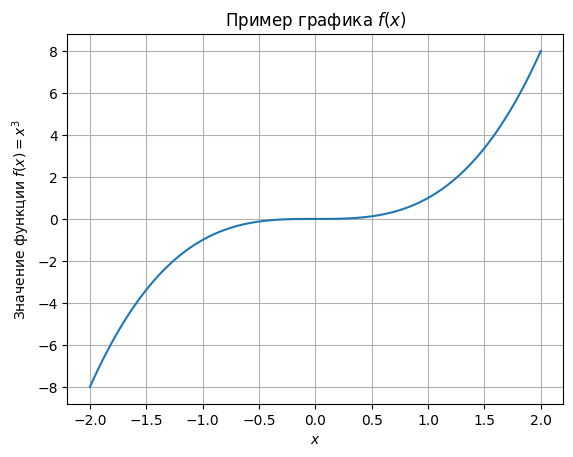

In [2]:
# Не забываем импортировать matplotlib.pyplot
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel("$x$")
ax.set_ylabel("Значение функции $f(x) = x^3$")
ax.set_title("Пример графика $f(x)$")
ax.grid(True)

Можно настроить отображение и через единный метод `plt.axis.set`, передав ему соответствующие именованные аргументы:

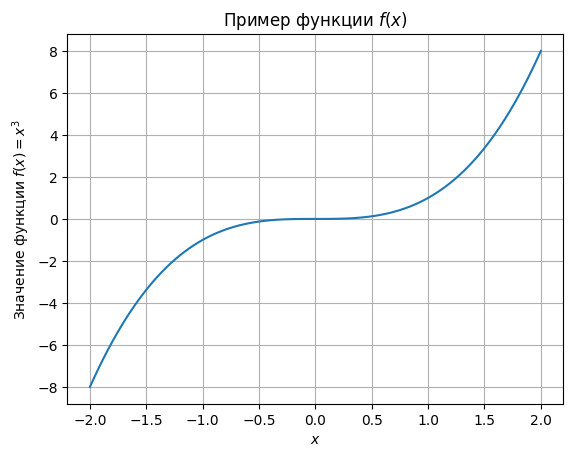

In [3]:
# Заново создадим объекты fig и ax,
# чтобы не было наложений на старый рисунок
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(
    xlabel="$x$",
    ylabel="Значение функции $f(x) = x^3$",
    title="Пример функции $f(x)$"
)
ax.grid(True)

## Цвет линии, её стиль и другие параметры

Сделаем линию утолщённой шриховой красной:

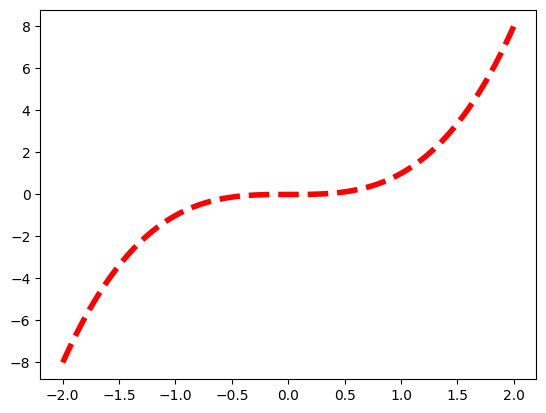

In [4]:
fig, ax = plt.subplots()
ax.plot(
    x, y,
    color="red", linestyle="--", linewidth=4
);

То же самое можно записать в сокращённой форме:

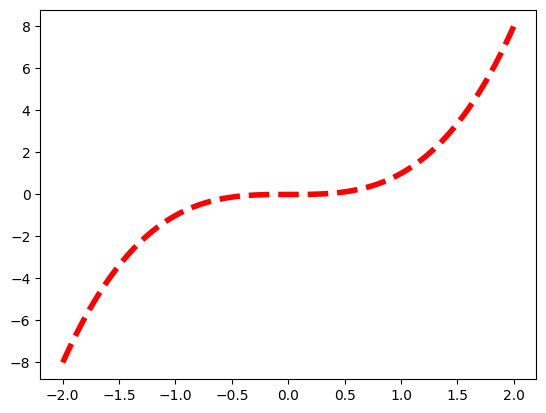

In [5]:
fig, ax = plt.subplots()
ax.plot(
    x, y,
    c="r", ls="--", lw=4
);

Или даже так:

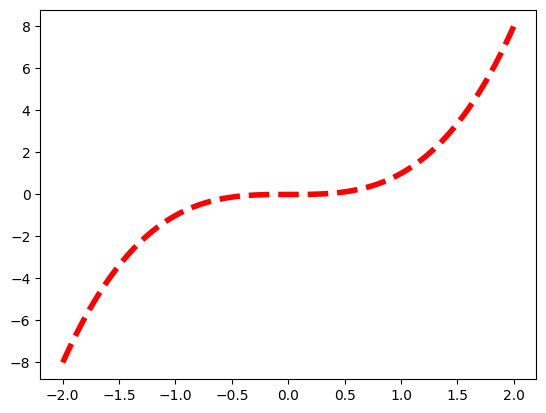

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y, "r--", lw=4);

Сделать график утолщённым точечным полупрозрачно-чёрным можно так:

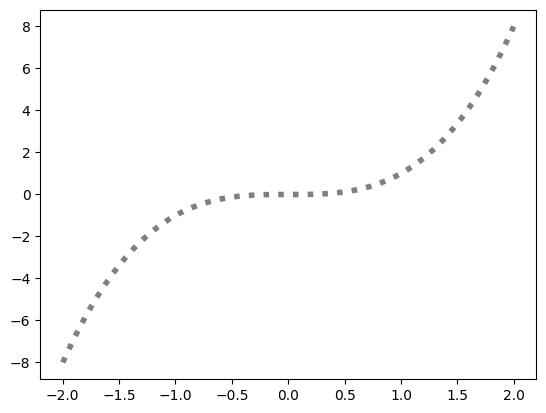

In [7]:
fig, ax = plt.subplots()
ax.plot(x, y, "k:", lw=4, alpha=0.5);

```{note}
Краткое обозначение чёрного цвета `k` (key-color) связано с тем, что сокращение `b` занято синим цветом (blue).
Если писать полное наименование цвета, то чёрный цвет, естественно, задаётся так `color="black"` или `c="black"`.
```

```{note}
Вы можете задавать любой цвет шестнадцатиричным кодом вот так `c="#cd5c5c"`.
```

Многие именованные параметры линий работают и для линий сетки. Вот, например, чёрная сетка в точку:

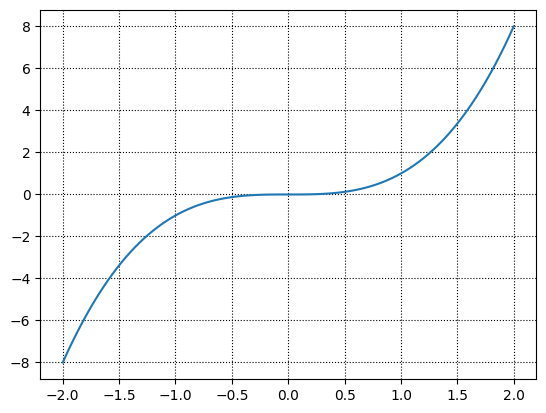

In [8]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.grid(True, c="k", ls=":")

## Пределы и масштабы осей

[matplotlib](https://matplotlib.org/) по умолчанию настраивает оси автоматически на основе входных данных.
В большинстве случаев этого достаточно.
Но иногда возникает необходимость назначить пределы осей вручную, например, когда эти пределы должны быть одинаковы на разных графиках.

Переназначить пределы осей можно через тот же метод `plt.axis.set(...)`
(или посредством отдельных методов `set_xlim(...)` и `set_ylim(...)` объекта класса `plt.axis`):

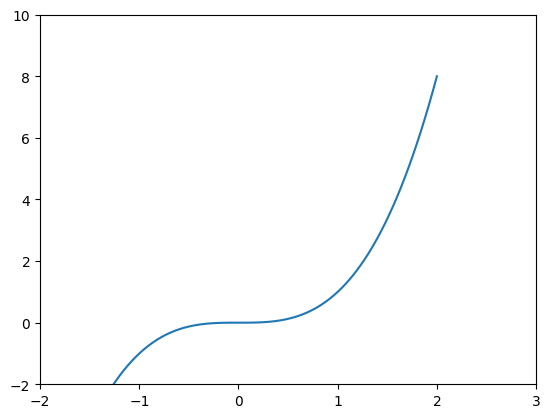

In [9]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(xlim=[-2, 3], ylim=[-2, 10]);

Можно заметить, что на всех ранее построенных графиках масштабы осей *x* и *y* неодинаковы.
Это искажает пропорции графика (следовательно, и любые углы), что в ряде случаев негативно сказывается на информативности графика.
В качестве примера можно привести изображение траектории полёта летательного аппарата в некоторой плоскости.

Сделать масштаб осей одинаковым вручную может быть затруднительно, поскольку масштаб зависит от размеров окна, геометрической длины осей. В [matplotlib](https://matplotlib.org/) реализована возможность построения в одинаковом масштабе по осям: `plt.axis.set_aspect("equal")` или `set(aspect="equal")`. В таком случае геометрия линий не будет искажена.
При этом, в интерактивном режиме растягивая окно графика, мы будем получать так же одинаковые масштабы осей.

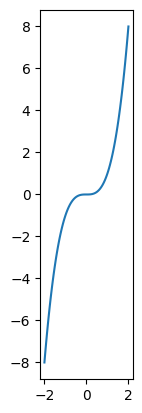

In [10]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(aspect="equal");

## Построение двух графиков в одних осях. Легенда

Построим в одном поле график кубической параболы {eq}`func_x3_eq`,
а также графики её производных: $f'(x) = 3 x^2$ и $f''(x) = 6 x$.

Опишем функции производных и рассчитаем данные в тех же рассчётных точках `x`:

In [11]:
def f_cubic_der(x):
    return 3 * x**2

def f_cubic_der2(x):
    return 6 * x

y_der = f_cubic_der(x)
y_der2 = f_cubic_der2(x)

Для этого просто ещё раз вызовем у оси `ax` метод `plot` с данными `x` и `y_der`. Заодно подпишем оси и отобразим сетку.

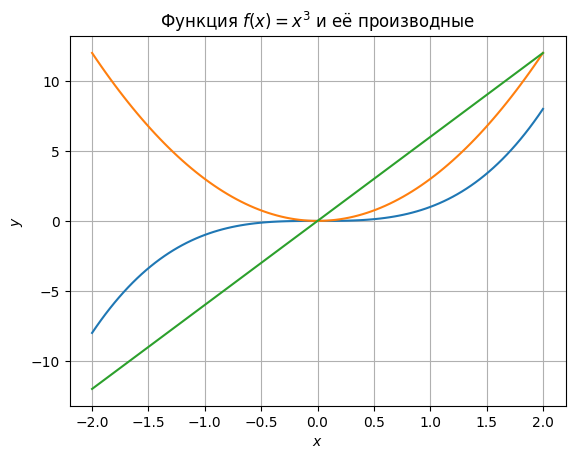

In [12]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(x, y_der)
ax.plot(x, y_der2)
ax.set(
    xlabel="$x$",
    ylabel="$y$",
    title="Функция $f(x) = x^3$ и её производные"
)
ax.grid()

Но как показать, где конкретно график функции, а где графики её производных?

Для этого предназначена легенда (legend) графика:
метод `plt.axis.legend(...)`.
Чтобы легенда отобразила содержательную информацию, необходимо в каждом методе `plt.axis.plot(...)` инициализировать поле `label` (метка, ярлык).
Текст этого поля `label` будет отображён в легенде графика.

```{note}
В тексте меток также возможно писать математические выражения `"\$...\$"`.
```

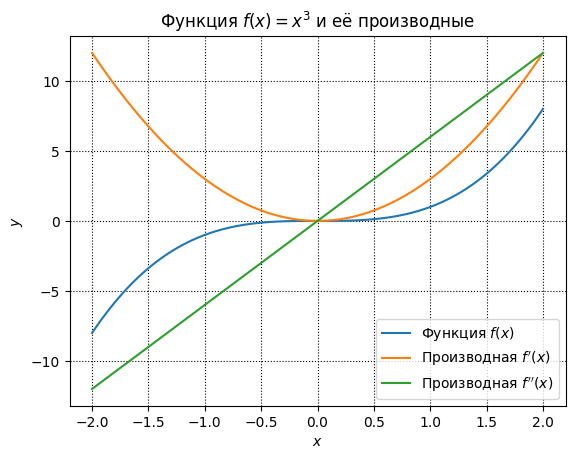

In [13]:
fig, ax = plt.subplots()
# Подписываем линии через label
ax.plot(x, y, label="Функция $f(x)$")
ax.plot(x, y_der, label="Производная $f'(x)$")
ax.plot(x, y_der2, label="Производная $f''(x)$")
ax.set(
    xlabel="$x$",
    ylabel="$y$",
    title="Функция $f(x) = x^3$ и её производные"
)
ax.grid(True, ls=":", c="k")
# Отобразим легенду.
# По умолчанию будет выбрано наилучшее расположение легенды.
ax.legend();

Измения параметров линий графиков будут отражаться и в легенде.
Для примера сделаем основной график потолще, первую производную - пунктирной, вторую - полупрозрачной.

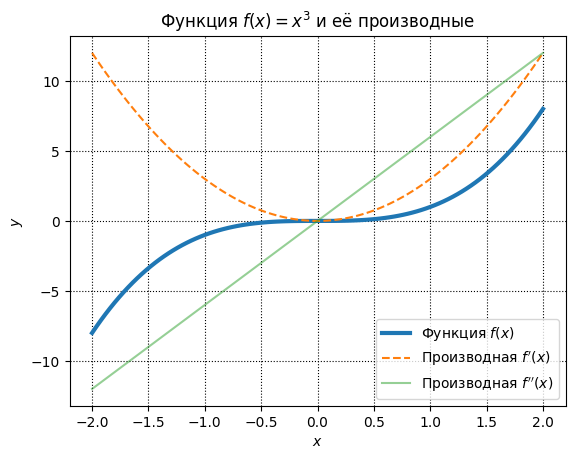

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y, label="Функция $f(x)$", lw=3)
ax.plot(x, y_der, label="Производная $f'(x)$", ls="--")
ax.plot(x, y_der2, label="Производная $f''(x)$", alpha=0.5)
ax.set(
    xlabel="$x$",
    ylabel="$y$",
    title="Функция $f(x) = x^3$ и её производные"
)
ax.grid(True, ls=":", c="k")
ax.legend();

Как видите, стили линий изменились как у самих линий, так и у их обозначений в легенде.

Также как вы уже могли заметить, [matplotlib](https://matplotlib.org/) автоматически назначает цвета графикам.
Цвета можно назначать и вручную. Когда это полезно? Рассмотрим такой случай.

Представьте, что вы оформляете отчёт по проделанной работе.
Вы помещаете туда построенные цветные графики.
Но у вас не оказалось цветного принтера, а печать цветного отчёта со множеством картинок и графиков в копирке может влететь в копеечку.
Печать же чёрно-белого варианта работы может привести к такому результату:

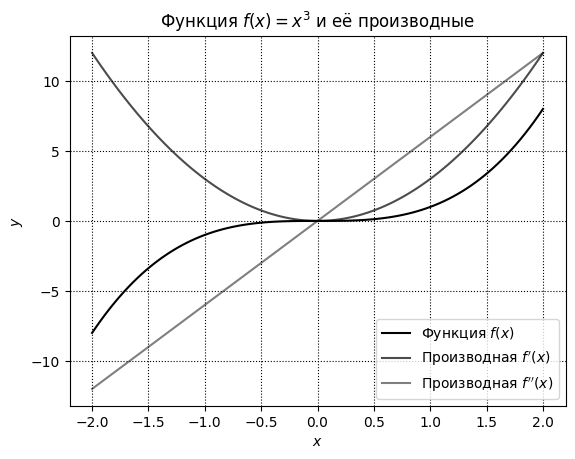

In [15]:
fig, ax = plt.subplots()
ax.plot(
    x, y,
    label="Функция $f(x)$", c="k"
)
ax.plot(
    x, y_der,
    label="Производная $f'(x)$", c="k", alpha=0.7
)
ax.plot(
    x, y_der2,
    label="Производная $f''(x)$", c="k", alpha=0.5
)
ax.set(
    xlabel="$x$",
    ylabel="$y$",
    title="Функция $f(x) = x^3$ и её производные"
)
ax.grid(ls=":", c="k")
ax.legend();

Различие между графиками размыто.
Различить графики можно по стилю линий или их толщине.
По умолчанию [matplotlib](https://matplotlib.org/) ничего со стилем и толщиной линий не делает.

Рекомендация следующая.
Если вы планируете печать или публикацию своей работы в оттенках серого, то стройте все графики в чёрном цвете, разделяя их стилями и/или толщинами линий, например, так:

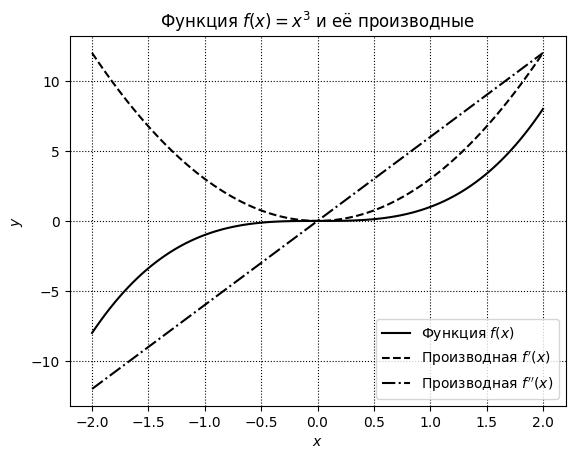

In [16]:
fig, ax = plt.subplots()
ax.plot(
    x, y,
    label="Функция $f(x)$", c="k"
)
# Вручную меняем стиль линий через параметр ls
ax.plot(
    x, y_der,
    label="Производная $f'(x)$", c="k", ls="--"
)
ax.plot(
    x, y_der2,
    label="Производная $f''(x)$", c="k", ls="-."
)
ax.set(
    xlabel="$x$",
    ylabel="$y$",
    title="Функция $f(x) = x^3$ и её производные"
)
ax.grid(True, ls=":", c="k")
ax.legend();

## Стили графиков

В [matplotlib](https://matplotlib.org/) имеется возможность настройки стилей графиков.
Делается это, как вариант, построением графиков в определённом стилевом контексте `plt.style.context(<style_name>)` с использованием оператора контекста `with` языка Python 3.

Список готовых стилей можно найти [здесь](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

Построим график в стиле *bmh*:

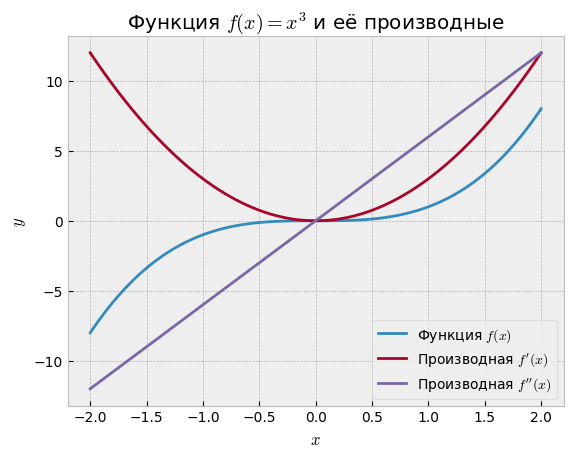

In [17]:
with plt.style.context("bmh"):
    fig, ax = plt.subplots()
    ax.plot(x, y, label="Функция $f(x)$")
    ax.plot(x, y_der, label="Производная $f'(x)$")
    ax.plot(x, y_der2, label="Производная $f''(x)$")
    ax.set(
        xlabel="$x$",
        ylabel="$y$",
        title="Функция $f(x) = x^3$ и её производные"
    )
    ax.legend()

Стиль помимо прочего определяет собственные последовательности цветов линий, фона, сетки, легенды, шрифтов и т.д.

Те же графики на тёмном фоне (полезно для презентаций в тёмных тонах или при публикациях на сайтах с тёмным окружением):

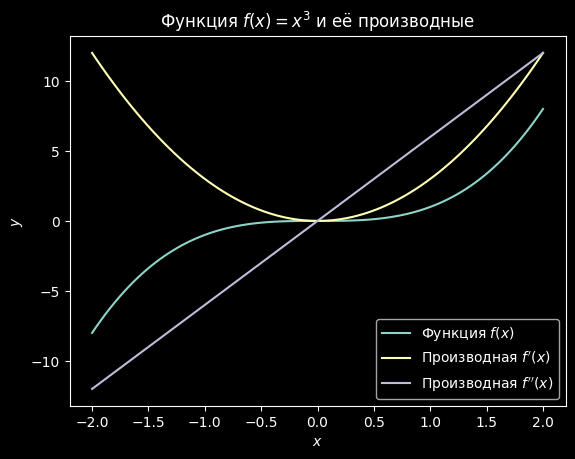

In [18]:
with plt.style.context("dark_background"):
    fig, ax = plt.subplots()
    ax.plot(x, y, label="Функция $f(x)$")
    ax.plot(x, y_der, label="Производная $f'(x)$")
    ax.plot(x, y_der2, label="Производная $f''(x)$")
    ax.set(
        xlabel="$x$",
        ylabel="$y$",
        title="Функция $f(x) = x^3$ и её производные"
    )
    ax.legend()

Для построения графиков для публикаций в оттенках серого вместо ручного переопределения цветов линий полезно использовать контекст *grayscale*, но при этом помнить о сложности различия оттенков и преимущественном различии графиков по стилю и/или толщине линий:

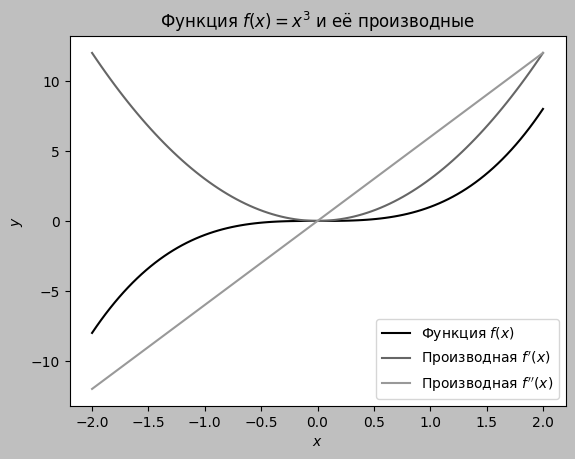

In [19]:
with plt.style.context("grayscale"):
    fig, ax = plt.subplots()
    ax.plot(x, y, label="Функция $f(x)$")
    ax.plot(x, y_der, label="Производная $f'(x)$")
    ax.plot(x, y_der2, label="Производная $f''(x)$")
    ax.set(
        xlabel="$x$",
        ylabel="$y$",
        title="Функция $f(x) = x^3$ и её производные"
    )
    ax.legend()

При стиле *seaborn-poster* будет построен большой график, качество которого позволяет распечатать его в высоком разрешении на большом формате, например, для постера:

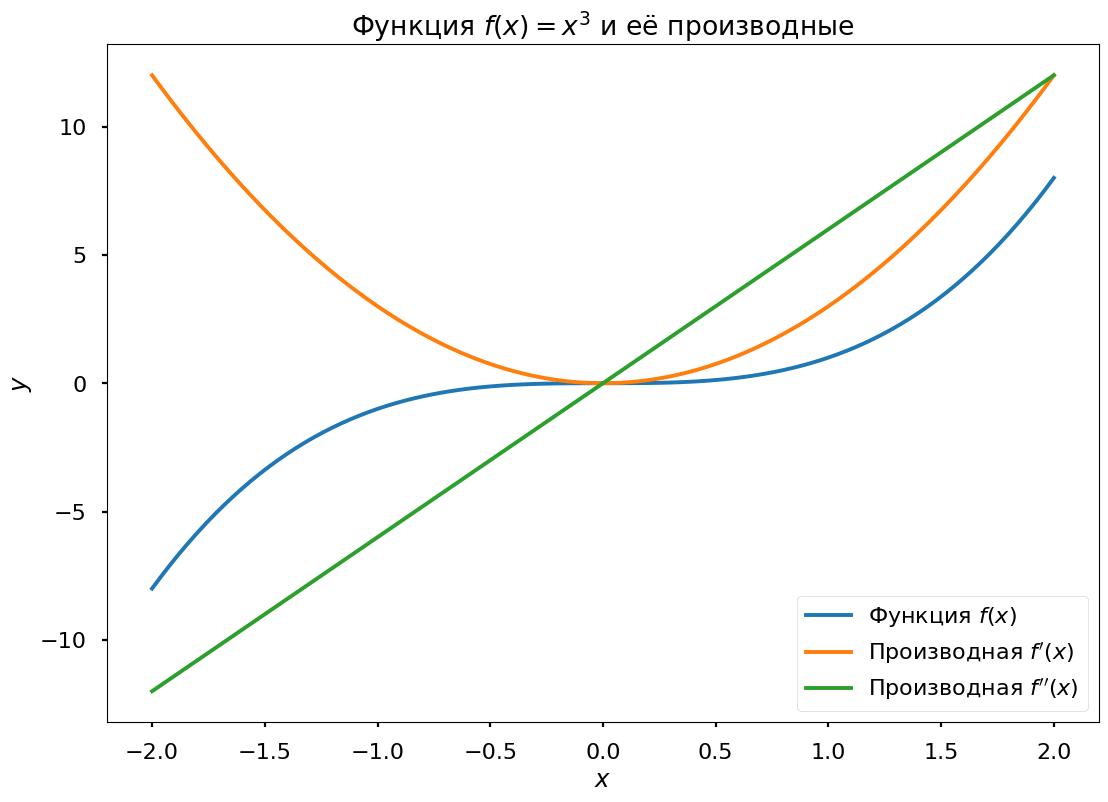

In [20]:
with plt.style.context("seaborn-poster"):
    fig, ax = plt.subplots()
    ax.plot(x, y, label="Функция $f(x)$")
    ax.plot(x, y_der, label="Производная $f'(x)$")
    ax.plot(x, y_der2, label="Производная $f''(x)$")
    ax.set(
        xlabel="$x$",
        ylabel="$y$",
        title="Функция $f(x) = x^3$ и её производные"
    )
    ax.legend()

### Создание собственного стиля графиков

Рассмотрим, как можно настроить свой собственный стиль графиков.

Настройка стиля производится через изменение словаря [`rcParams`](https://matplotlib.org/stable/tutorials/introductory/customizing.html), являющегося глобальной переменной библиотеки [matplotlib](https://matplotlib.org/).

Основные требования к нашему стилю следующие:

* семейство шрифта - serif (шрифт с засечками);
* размер шрифта - 11pt;
* использование $\LaTeX$'а для отображения формул;
* цвет линий по умолчанию - чёрный;
* сетка - точечная серая, по умолчанию не отображается;
* цвет осей - серый;
* и др. настройки ниже.

Чтобы не создавать словарь с нуля, будем отталкиваться от словаря стиля по умолчанию:

In [21]:
# cycler нужен для создания циклического перестановщика стилей
from cycler import cycler
# Имортируем саму библиотеку, а не pyplot.
# Именно в mpl ней лежит rcParams.
import matplotlib as mpl

# Копируем настройки по умолчанию
custom_style = mpl.rcParams.copy()
# Изменяем настройки
custom_style["figure.dpi"] = 120

custom_style["font.family"] = "serif"
custom_style["font.size"] = 11

custom_style["mathtext.fontset"] = "cm"

custom_style["axes.prop_cycle"] = (
    cycler(color=["k"]*4) +
    cycler(ls=["-", "--", ":", "-."])
)
custom_style["axes.linewidth"] = 1.5
custom_style["axes.edgecolor"] = "#c0c0c0"
custom_style["axes.grid"] = False

custom_style["xtick.major.size"] = 4
custom_style["xtick.major.width"] = 1.2
custom_style["xtick.color"] = "#c0c0c0"
custom_style["xtick.labelcolor"] = "k"

custom_style["ytick.major.size"] = 4
custom_style["ytick.major.width"] = 1.2
custom_style["ytick.color"] = "#c0c0c0"
custom_style["ytick.labelcolor"] = "k"

custom_style["grid.linestyle"] = ":"
custom_style["grid.color"] = "#c0c0c0"

custom_style["legend.framealpha"] = 1
custom_style["legend.edgecolor"] = "1"

Теперь у нас есть собственные настройки. Мы можем хранить их как глобальную переменную нашей программы и в нужный момент построить в этом стиле любой график вот так:

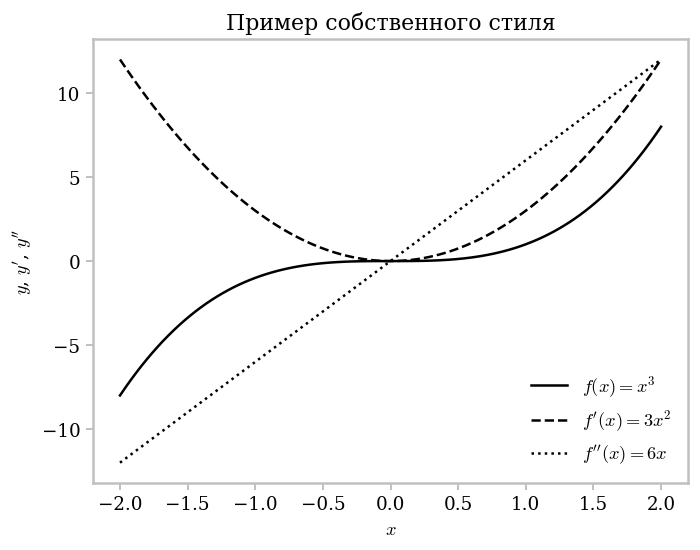

In [22]:
with plt.rc_context(custom_style):
    fig, ax = plt.subplots()
    ax.plot(x, y, label="$f(x) = x^3$")
    ax.plot(x, y_der, label="$f'(x) = 3 x^2$")
    ax.plot(x, y_der2, label="$f''(x) = 6 x$")
    ax.set(
        xlabel="$x$",
        ylabel="$y$, $y'$, $y''$",
        title="Пример собственного стиля"
    )
    ax.legend()

## Вертикальные, горизонтальные и наклонные линии

Методы `axline(...)`, `axvline(...)` и `axhline(...)` класса `plt.axis` предназначены для изображения бесконечных наклонных, вертикальных и горизонтальных прямых соответственно.
_Бесконечность_ в данном случае означает, что прямые проходят через всё поле построения графика, в т.ч. после масштабирования последнего.

Рассмотрим график гиперболы

$$f(x) = \cfrac{1}{x - 2} - 3.$$

In [23]:
def f_hyperbola(x):
    return 1 / (x - 2) - 3

xh = np.linspace(2.1, 12, 301)
yh = f_hyperbola(xh)

С помощью `axvline` и `axhline` мы можем показать соответственно вертикальную $x = 2$ и горизонтальную $y = -3$ асимптоты:

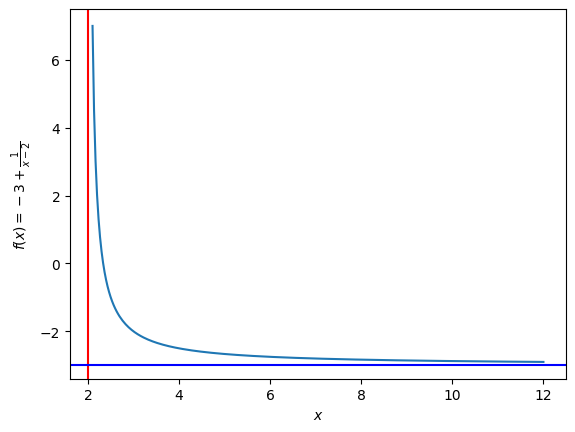

In [24]:
fig, ax = plt.subplots()
ax.plot(xh, yh)
ax.axvline(2, c="r")
ax.axhline(-3, c="b")
ax.set(
    xlabel="$x$",
    ylabel=r"$f(x) = -3 + \frac{1}{x - 2}$"
);

Известно, что для данной гиперболы значение производной

$$f'(x) = -\cfrac{1}{(x - 2)^2}$$

в точке $x_0 = 3$ равно $-1$,
т.е. тангенс угла наклона касательной прямой в этой точке $k = -1$.
Значение самой функции $f(x_0) = -2$.
Используя эти данные, можно построить касательную к функции $f(x)$ в точке $x_0$.

Уравнение касательной $f_{\rm tan}(x) = k x + b$ получается элементарно:
тангенс наклона известен ($k = -1$),
смещение прямой

$$b = f(x_0) - k x_0 = -2 - (-1 \cdot 3) = 1.$$

Тогда уравнение касательной имеет вид

$$f_{\rm tan}(x) = 1 - x.$$

Эта прямая пройдёт через две точки: $(3, -2)$ и $(2, -1 )$.
Прямая по двум точкам строится методом `plt.axis.axline(...)` так:

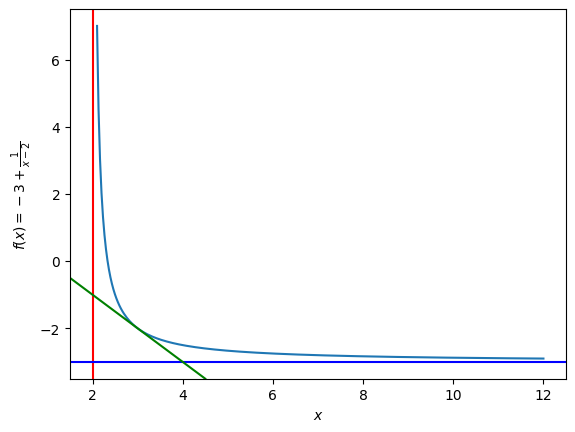

In [25]:
fig, ax = plt.subplots()
ax.plot(xh, yh)
ax.axvline(2, c="r")
ax.axhline(-3, c="b")

ax.axline((3, -2), (2, -1), c="g")

ax.set(
    xlabel="$x$",
    ylabel=r"$f(x) = -3 + \frac{1}{x - 2}$"
);

Можно отдельно выделить точку касания $(x_0; f(x_0)) = (3; -2)$:

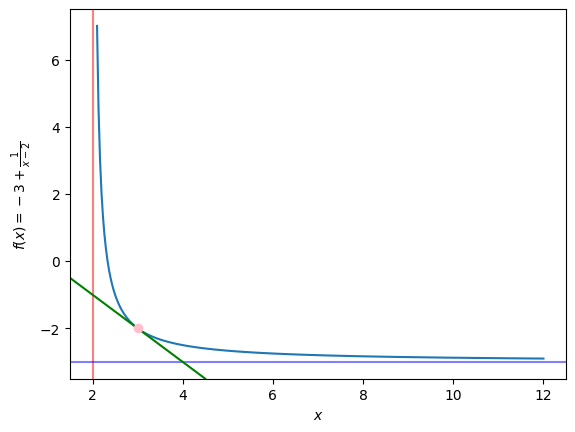

In [26]:
fig, ax = plt.subplots()
ax.plot(xh, yh)
ax.axvline(2, c="r", alpha=0.5)
ax.axhline(-3, c="b", alpha=0.5)
# Касательная
ax.axline((3, -2), (2, -1), c="g")
# Точка касания
ax.plot(3, -2, ls="", marker="o", c="pink")

ax.set(
    xlabel="$x$",
    ylabel=r"$f(x) = -3 + \frac{1}{x - 2}$"
);

Или в собственном стиле с добавлением легенды и одинаковым масштабом по осям:

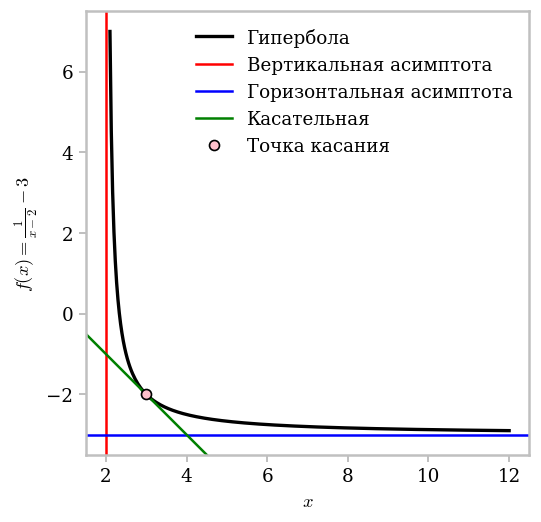

In [27]:
with plt.rc_context(custom_style):
    fig, ax = plt.subplots()

    ax.plot(xh, yh, lw=2, label="Гипербола")

    ax.axvline(
        2,
        c="r",
        label="Вертикальная асимптота"
    )
    ax.axhline(
        -3,
        c="b",
        label="Горизонтальная асимптота"
    )
    ax.axline(
        (3, -2), (2, -1),
        c="g",
        label="Касательная"
    )
    
    ax.plot(
        3, -2,
        ls="", marker="o", c="pink", markeredgecolor="k",
        label="Точка касания"
    )

    ax.set(
        xlabel="$x$",
        ylabel=r"$f(x) = \frac{1}{x - 2} - 3$",
        aspect="equal"
    )
    ax.legend();

## Несколько осей на одном поле

Рассмотрим, как в одном окне построить несколько графиков. Для этого сформулируем новую задачу.

Пусть задана функция движения материальной точки вида

$$x(t) = t^2 + t \sin{t} + \cfrac{1}{t + 1}.$$

Функция скорости соответственно имеет вид 

$$v(t) = \dot{x}(t) = 2t + \sin{t} + t \cos{t} - \cfrac{1}{(t + 1)^2}.$$

Требуется построить графики этих функций один под другим.

Сформируем данные для визуализации:

In [28]:
def f_coordinate(t):
    return t**2 + t*np.sin(t) + 1/(t + 1)

def f_velocity(t):
    return 2*t + np.sin(t) + t*np.cos(t) - 1/(t + 1)**2

t = np.linspace(0, 3, 101)
x, v = f_coordinate(t), f_velocity(t)

Подробнее рассмотрим метод `plt.sublots(...)`.
Как раз с его помощью можно решить поставленную задачу, создав несколько _субграфиков_:

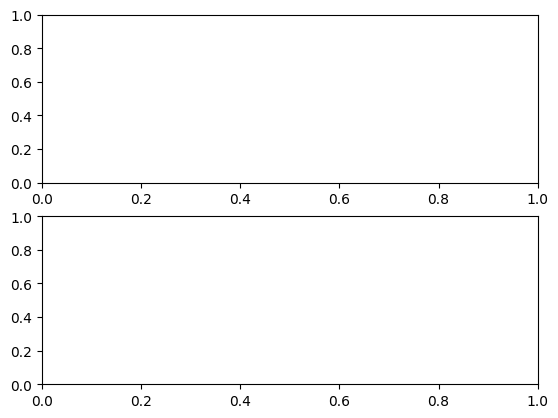

In [29]:
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2)
# Задали расположение графиков в 2 строки

Теперь у нас есть два рабочих поля для построения графиков (две оси) - верхнее и нижнее.
Объекты `ax_top` и `ax_bottom` "работают" точно так же, как рассмотренные выше бъекты `ax` -
они такие же объекты класса `plt.axis`.

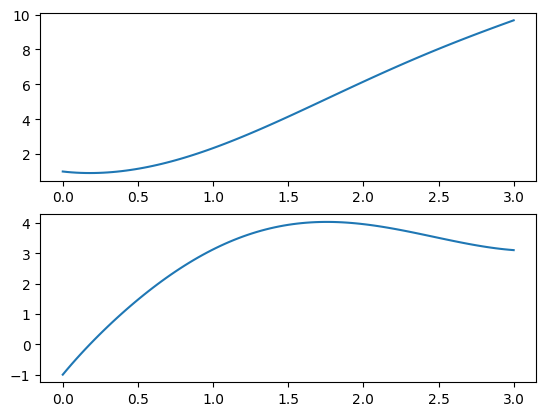

In [30]:
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2)
ax_top.plot(t, x)
ax_bottom.plot(t, v);

Подпишем оси:

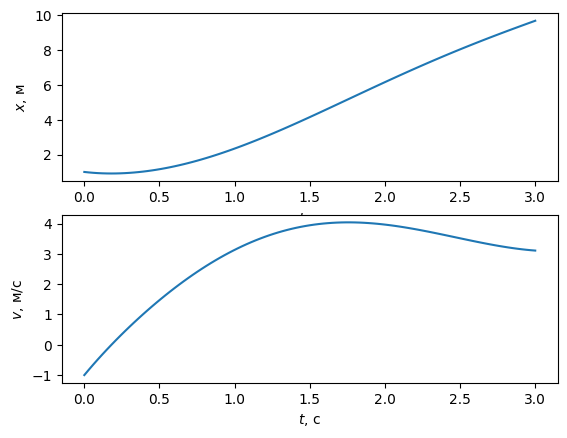

In [31]:
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2)

ax_top.plot(t, x)
ax_top.set(xlabel="$t$, с", ylabel="$x$, м")

ax_bottom.plot(t, v)
ax_bottom.set(xlabel="$t$, с", ylabel="$v$, м/с");

Заметили, что подпись оси *x* на верхнем графике перекрыта нижним графиком?

С этим можно справиться либо изменением размера фигуры, либо назначением общих осей.
Второй вариант в данном случае - более хорошее решение.
Видно, что данные на осях *x* обоих графиков одинаковы и в физическом, и в численном отношении -
это время $t$.

Сделать оси _x_ общими можно передачей в метод `plt.subplots(...)` аргумента `sharex=True`.
Также уберём метку `xlabel` в `ax_top.set(...)`.

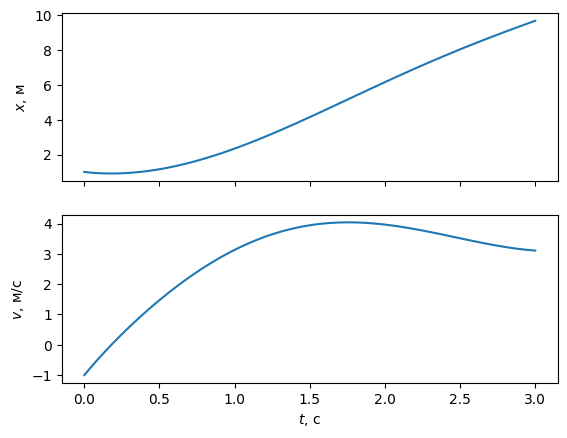

In [32]:
fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, sharex=True)

ax_top.plot(t, x)
ax_top.set(ylabel="$x$, м")

ax_bottom.plot(t, v)
ax_bottom.set(xlabel="$t$, с", ylabel="$v$, м/с");

Теперь графики выглядят более органично. И мы всё ещё можем использовать стилевой контекст. Заодно добавим названия (title) каждого графика:

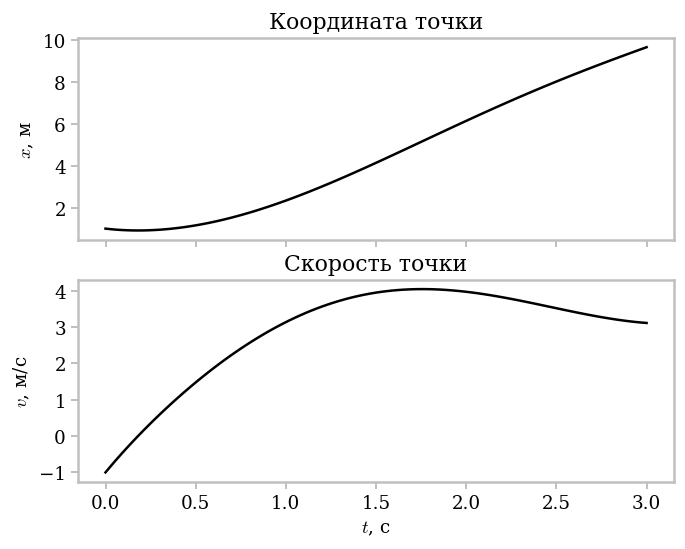

In [33]:
with plt.rc_context(custom_style):
    fig, (ax_top, ax_bottom) = plt.subplots(nrows=2, sharex=True)

    ax_top.plot(t, x)
    ax_top.set(
        ylabel="$x$, м",
        title="Координата точки"
    )

    ax_bottom.plot(t, v)
    ax_bottom.set(
        xlabel="$t$, с",
        ylabel="$v$, м/с",
        title="Скорость точки"
    )